# 지도학습의 종류

# 분류(Classification)
* 미리 정의된, 여러 클래스 레이블(class label) 중 하나를 예측
* 이진(binary) 분류와 다중(multiclass) 분류로 구분
* 이진 분류 - 답이 예/아니오만 나오는 것
* 다중 분류

# 회귀 (Regression)
* 연속적인 값(실수)을 예측
* 예) 어떤 사람의 교육수준, 나이, 주거지 등 데이터를 바탕으로 연간 소득 예측

In [6]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

# Forge 데이터셋

# 1. 데이터셋 적재 및 확인하기

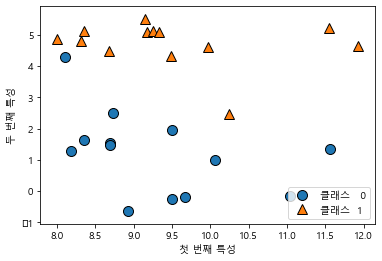

X.shape : (26, 2)


In [8]:
import matplotlib.pyplot as plt
import mglearn
X,y = mglearn.datasets.make_forge()
#산점도 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스   0","클래스  1"],loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
plt.show()
print("X.shape : {}".format(X.shape))

# 2. k-최근접 이웃 알고리즘 적용하기 (p.63)

## knn : k-Nearest Neighbors

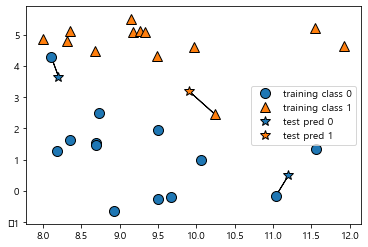

In [10]:
# 이웃의 수를 1로 설정
mglearn.plots.plot_knn_classification(n_neighbors=1) # n_neighbors=1 - 이웃을 1로 설정
plt.show()

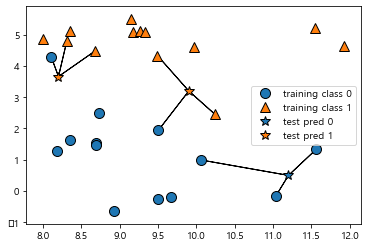

In [11]:
# 이웃의 수를 3으로 설정
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

# 3. k-최근접 이웃 알고리즘의 성능 평가

In [13]:
# 데이터를 훈련 세트와 테스트 세트로 나눔(훈련, 테스트, 검증)
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# KNeighborsClassifier 객체 생정
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# 훈련세트를 사용한 분류 모델 학습
clf.fit(X_train, y_train)

# 테스트 데이터 예측 - predict 메서드 호출
print("예측 : {}".format(clf.predict(X_test)))

# 테스트 세트 정확도 - 얼마나 잘 일반화 되었는지 score 메서드로 확인
print("테스트 세트의 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

예측 : [1 0 1 0 1 0 0]
테스트 세트의 정확도 : 0.86


In [14]:
y_pred = clf.predict(X_test)
print("예측값:\n", y_pred)

예측값:
 [1 0 1 0 1 0 0]


In [15]:
import pandas as pd
comparison = pd.DataFrame({'예측값':y_pred, '실제값':y_test})
comparison

,예측값,실제값
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,0,1
6,0,0


# KNN 최근접 이웃 알고리즘 (p. 67)

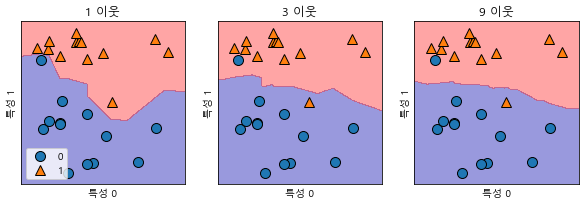

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)
plt.show()

* 이웃의 수를 늘릴수록 결정 경계는 부드러워짐
* 즉, 이웃을 적게 사용하면 모델의 복잡도가 높아짐

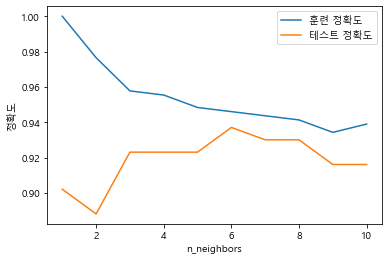

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# 위스콘신 유방암 데이터셋
## 유방암 종양의 임상데이터를 기록
## 각 종양은 양성(benign)과 악성(malignant)로 레이블되어 있으며, 종양이 악성인지를 예측(p.67)

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(cancer.DESCR) # 데이터셋 요약

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
cancer_data = cancer.data
cancer_df = pd.DataFrame(data=cancer_data,
                        columns = cancer.feature_names)
cancer_df['label'] = cancer.target
cancer_df.head(5) # 데이터 전처리

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


array([212, 357], dtype=int64)

In [9]:
print("클래스별 샘플 갯수:\n",
     {n: v for n, v in zip(cancer.target_names,
                          np.bincount(cancer.target))})

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [10]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
